In [13]:
import pandas as pd

data = pd.read_csv("shampoo.csv")
data["Month"] = pd.to_datetime(data["Month"])
data = data.set_index("Month")

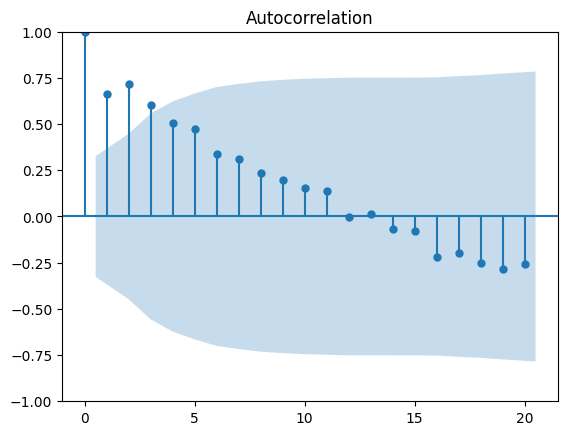

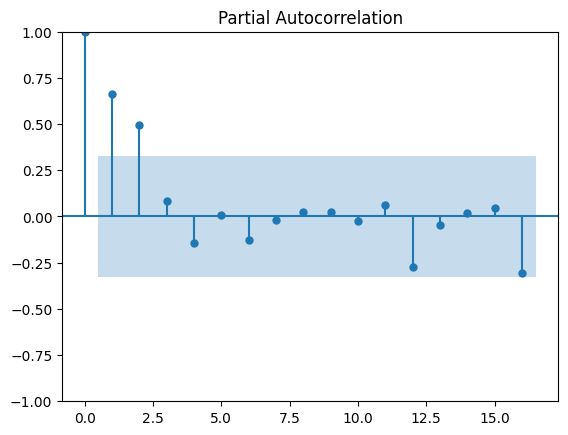

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data, lags = 20)
plot_pacf(data)
plt.show()

In [15]:
size = int(len(data) * 0.80)
train, test = data[ : size], data[size : ]

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.filterwarnings("ignore")

import itertools
p = d = q = range(0, 5)
pdq_combinations = list(itertools.product(p, d, q))

min_error = 10 ** 9
optimum_pdq = (0, 0, 0)

for pdq in pdq_combinations:
  try:
    model = ARIMA(train, order = pdq).fit()
    predict = model.forecast(len(test))
    error = np.sqrt(mse(test, predict))
    if error < min_error:
      min_error = error
      optimam_pdq = pdq
  except:
    continue

print(optimam_pdq, min_error)

(2, 3, 4) 78.63882738830017


In [17]:
model = ARIMA(train, order = optimam_pdq).fit()

In [19]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   28
Model:                 ARIMA(2, 3, 4)   Log Likelihood                -144.719
Date:                Thu, 25 Jan 2024   AIC                            303.438
Time:                        02:17:27   BIC                            311.970
Sample:                             0   HQIC                           305.804
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3214      0.790     -1.673      0.094      -2.869       0.226
ar.L2         -0.3384      0.328     -1.030      0.303      -0.982       0.305
ma.L1         -1.9679     56.341     -0.035      0.9

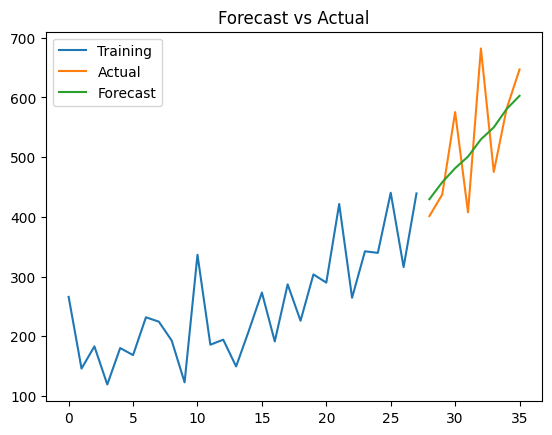

In [20]:
predict = model.forecast(len(test))

plt.plot(train, label = "Training")
plt.plot(test, label = "Actual")
plt.plot(predict, label = "Forecast")
plt.title("Forecast vs Actual")
plt.legend()
plt.show()

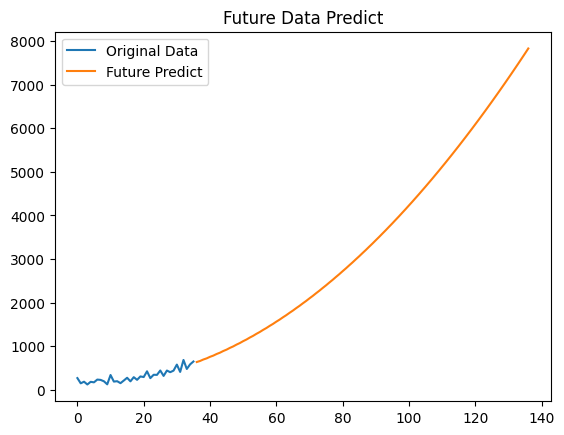

In [22]:
future_predict = model.predict(start = len(data), end = len(data) + 100, dynamic = True)


plt.plot(data, label = "Original Data")
plt.plot(future_predict, label = "Future Predict")
plt.title("Future Data Predict")
plt.legend()
plt.show()